In [1]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [4]:
dt = '4/30/2014 23:22:00'

In [5]:
d, t = dt.split(' ')
print('Date: '+d)
print('Time: '+t)

Date: 4/30/2014
Time: 23:22:00


In [6]:
dt = pd.to_datetime(dt)

In [24]:
print(dt.month,dt.day,dt.year,dt.hour)

4 30 2014 23


# Conver datetime and add some useful columns

In [9]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [10]:
def get_day(dt):
    return dt.day

data['day'] = data['Date/Time'].map(get_day)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,day
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [25]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

def get_month(dt):
    return dt.month

def get_year(dt):
    return dt.year

def get_hour(dt):
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)
data['month'] = data['Date/Time'].map(get_month)
data['year'] = data['Date/Time'].map(get_year)
data.tail()

,Date/Time,Lat,Lon,Base,day,weekday,month,year,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,4,2014,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,4,2014,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,4,2014,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,4,2014,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,4,2014,23


# Analysis for Day of Month


Text(0.5, 1.0, 'Frequency by Days of The Month - Uber')

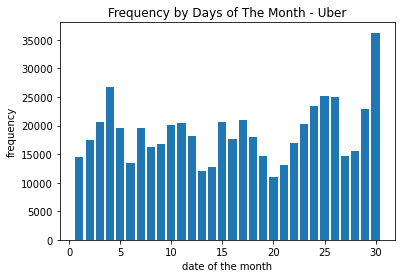

In [13]:
hist(data.day,bins=30,rwidth=0.8,range=[0.5,30.5])
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Days of The Month - Uber')

In [14]:
for k,rows in data.groupby('day'):
    print((k,rows))
    break
    

(1,                  Date/Time      Lat      Lon    Base  day  weekday  month  \
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1      4   
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1      4   
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1      4   
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1      4   
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1      4   
...                    ...      ...      ...     ...  ...      ...    ...   
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764    1        1      4   
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764    1        1      4   
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764    1        1      4   
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764    1        1      4   
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764    1        1      4   

        year  
0       2014  
1       2014  
2       2014  
3       201

In [15]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('day').apply(count_rows)
by_date

day
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

# Sorted frequency 

''

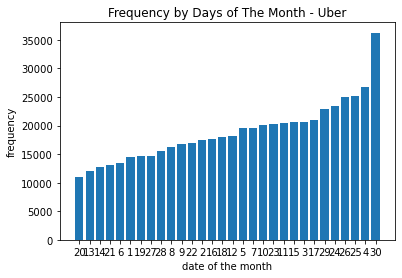

In [22]:
by_date_sorted = by_date.sort_values()
bar(range(1,31),by_date_sorted)
xticks(range(1,31),by_date_sorted.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by Days of The Month - Uber')
;

# Analyze the hour

(array([11910.,  7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924.,
        22843., 17939., 17865., 18774., 19425., 22603., 27190., 35324.,
        42003., 45475., 43003., 38923., 36244., 36964., 30645., 20649.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

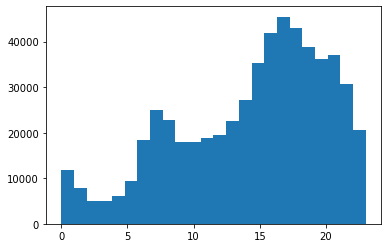

In [26]:
hist(data.hour,bins=24)

# Analyze weekday

''

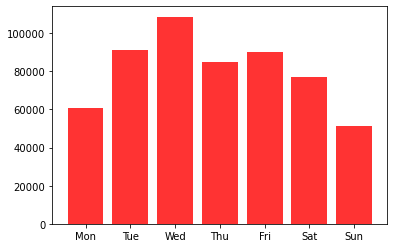

In [17]:
hist(data.weekday,bins=7,range=(-0.5,6.5),rwidth=0.8,color='red',alpha=0.8)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;

# Cross Analysis (hour,dow)

<AxesSubplot:xlabel='hour', ylabel='weekday'>

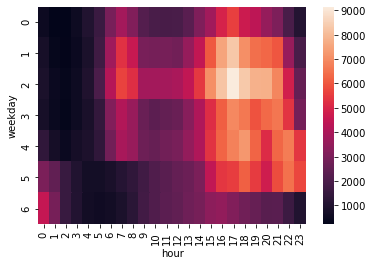

In [29]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()
seaborn.heatmap(by_cross)

# By Lat and Lon

''

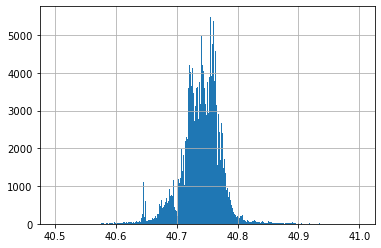

In [35]:
hist(data['Lat'],bins=1000,range=(40.5,41))
grid()
;

''

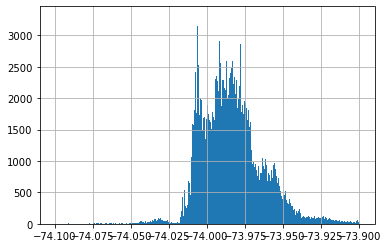

In [38]:
hist(data['Lon'],bins=1000,range=[-74.1,-73.9])
grid()
;

''

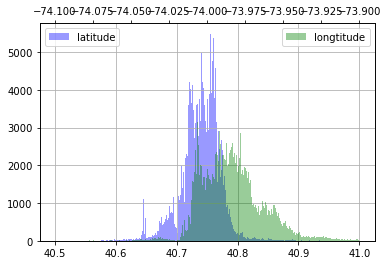

In [41]:
hist(data['Lat'],bins=1000,range=(40.5,41),color='blue',alpha=0.4,label='latitude')
grid()
legend(loc='upper left')
twiny()
hist(data['Lon'],bins=1000,range=[-74.1,-73.9],color='green',alpha=0.4,label='longtitude')
legend(loc='best')

;

(40.5, 41.0)

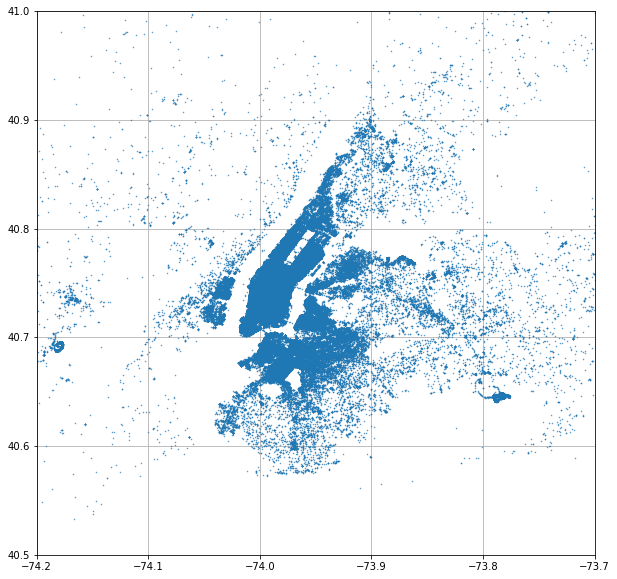

In [47]:
figure(figsize=(10,10))
plot(data['Lon'],data['Lat'],'.',ms=1,alpha=0.8)
grid()
xlim(-74.2,-73.7)
ylim(40.5,41)